# Binary Systems in Astrophysics WS 2021/2022

Today's tutorial is dedicated to the analysis of radial velocities, and we are going to use the package RadVel ( https://radvel.readthedocs.io/en/latest/).

This tutorial is based on the online examples from the RadVel documentation (https://github.com/California-Planet-Search/radvel/tree/master/example_planets). If you are interested in the project, you will find more information in Fulton et al. 2018 (https://iopscience.iop.org/article/10.1088/1538-3873/aaaaa8). The data used is from Bischoff et al. 2017 (https://arxiv.org/pdf/1707.05090.pdf), was taken with the spectrograph FLECHAS operating at the University Observatory Jena in Germany (Mugrauer et al. 2014, https://onlinelibrary.wiley.com/doi/pdf/10.1002/asna.201312046) and is publickly available in VizieR (https://vizier.cds.unistra.fr/viz-bin/VizieR?-source=J/AN/338/671).

To install RadVel, run the following line in your terminal:

$ pip install radvel

Remember that, as always, you can get this jupyter notebook entering your local binary folder linked to GitLab and pulling the new material:

$ git pull


## 7. Radial velocities: Derivation of orbital parameters

In order to connect the radial velocity with the orbital parameters, we can do the projection of the orbit into the z axis perpendicular to the tangent plane of the sky:

<center>$z = r \textrm{ sin}(\nu + \omega) \cdot \textrm{sin} (i)$

and obtain its first derivative
    
<center>$\dot{z} = v_r = K \left[ \textrm{ cos}(\nu + \omega) + e \cdot \textrm{cos} (\omega) \right]$
    
    
    
    
    

where 

- $e$ is the eccentricity 
- $\omega$ is the periastron angle
- $\nu$ is the true anomaly; connected to the eccentric anomaly that we saw in the Kepler equation exercise

$$ \nu = 2\textrm{ tan}^{-1} \left( \sqrt{\frac{1+e}{1-e}} \textrm{tan} \frac{E}{2} \right)$$

- $K$ is the velocity semi-amplitude, which is defined as

$$K = \frac{2\pi a\cdot \textrm{sin} (i)}{P\sqrt{1-e^2}}$$


Together with the Kepler equation


<center>$E-e\cdot sin E =\frac{2\pi}{P} (t- T_0)$


we will be able to constrain the following five parameters: $P$, $T_0$, $\omega$, $e$ and $K$. This is one less than the 6 necessary to completely constrain an orbit, because both $a$ and $i$ are degenerated parameters depending on $K$.

However, at least we can apply some constraints to the masses already, obtaining the mass function

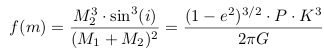

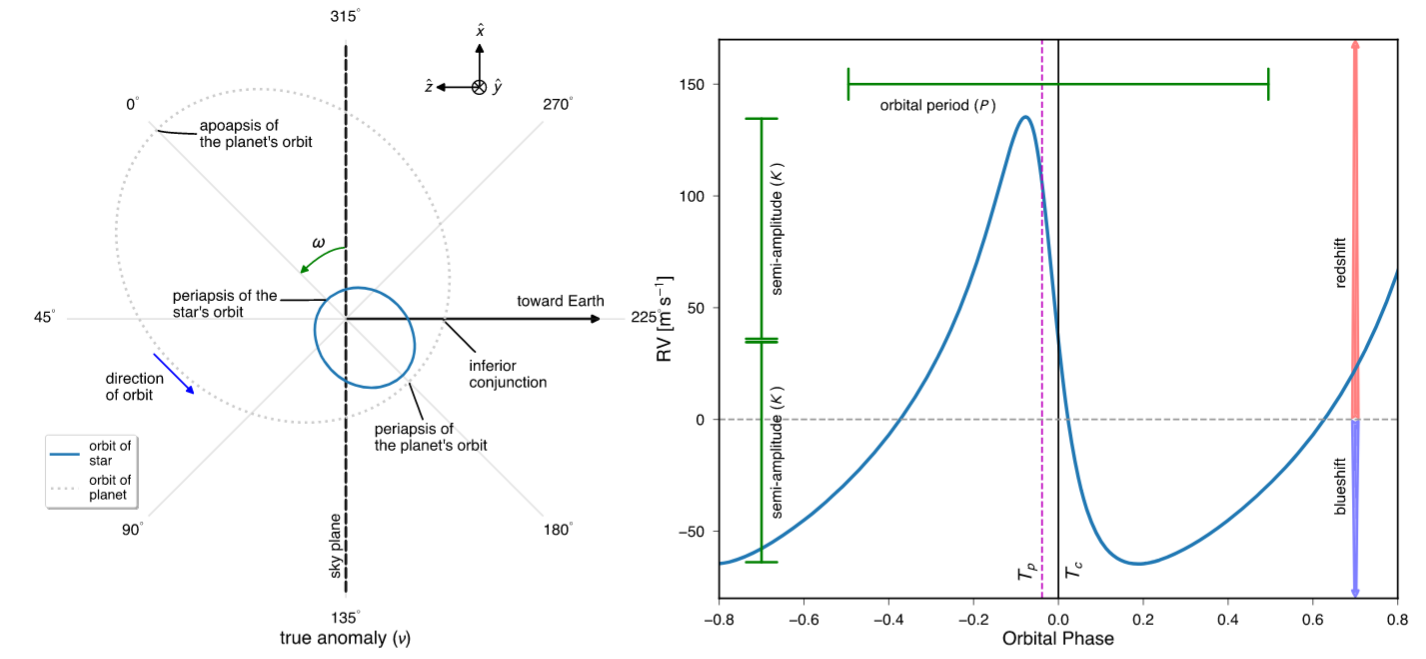

Image credit: Fulton et al. 2018

So let's try to see how we can apply this, and start loading all packages that we will need

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import radvel
import pandas as pd

/home/willde/Programes/anaconda3/lib/python3.8/site-packages/radvel/gp.py:32: ImportWarning: celerite not installed. GP kernals using celerite will not work. Try installing celerite using 'pip install celerite'
  warnings.warn("celerite not installed. GP kernals using celerite will not work. \


In [2]:
n_companions = 1 # Number of bodies orbiting the primary (the code can be used for many planets)
time_base = 0 # Time shift

And which parameters will we extract? There are many possibilities implemented ...

In [4]:
radvel.basis.BASIS_NAMES

['per tp e w k',
 'per tc secosw sesinw logk',
 'per tc secosw sesinw k',
 'per tc ecosw esinw k',
 'per tc e w k',
 'per tc tp e w k',
 'logper tc secosw sesinw k',
 'logper tc secosw sesinw logk',
 'per tc se w k',
 'logper tp e w logk']

We will take the first option and initialize our model with some initial value for each of the parameters :)

In [5]:
def initialize_model():
    
    params = radvel.Parameters(n_companions, basis='per tp e w k')
    params['per1'] = radvel.Parameter(value=50) # 1 refers to body 1
    params['tp1'] = radvel.Parameter(value=2456957.0)
    params['e1'] = radvel.Parameter(value=0.3)
    params['w1'] = radvel.Parameter(value=20)
    params['k1'] = radvel.Parameter(value=30.0)
    params['gamma'] = radvel.Parameter(value=0) # Shift from v_r = 0 -> We will not fit it!

    mod = radvel.RVModel(params, time_base=time_base)
    mod.params['dvdt'] = radvel.Parameter(value=0.00) # Derivative on the velocity
    mod.params['curv'] = radvel.Parameter(value=0.00) # Derivative on the curvature of the system
    return mod

For practical purposes, let's create a definition to plot the data and the model

In [6]:
def plot_results(like):
    fig = plt.figure(figsize=(12,4))
    fig = plt.gcf()
    fig.set_tight_layout(True)
    plt.errorbar(t, vel,yerr=errvel, fmt='o')
    plt.plot(t_interval, like.model(t_interval))
    plt.xlabel('Time')
    plt.ylabel('RV')
    plt.draw()

But the last things that we need to prepare is the data, let's load it

In [7]:
data= pd.read_csv('../data/alpha_draconis.csv')
data

,BJD,RV,e_RV
0,2.457431e+06,-39.8,0.8
1,2.457457e+06,51.8,0.8
2,2.457458e+06,50.9,0.8
3,2.457464e+06,-17.0,0.8
4,2.457465e+06,-21.7,0.8
5,2.457485e+06,-37.4,0.8
6,2.457486e+06,-36.8,0.8
7,2.457491e+06,-27.6,0.8
8,2.457500e+06,0.3,0.8
9,2.457500e+06,4.0,0.8


In [8]:
### So we define some arrays that will contain the data
t = np.array(data['BJD'])
vel = np.array(data['RV'])
errvel = np.array(data['e_RV'])
t_interval = np.linspace(t[0],t[-1],len(t)*10)

So let's start!

We need to construct a certain model likelihood for a dataset $D$

$$\textrm{L}(\theta \vert \textrm{D}) = -\frac{1}{2}\sum_j \frac{\left[v_r(t, \theta)-d_j\right]^2}{\sigma_j^2+\sigma_{jit}^2} -\textrm{ln} \sqrt{2\pi(\sigma_j^2 \sigma_{jit}^2)}$$

where $t$ is the time, $\theta$ is the array of parameteres, $\sigma_{jit}$ is the instrumental error, $d_j$ is the actual measurement and $\sigma_j$ is the error of the corresponding measurement.

In [9]:
mod = initialize_model()
like = radvel.likelihood.RVLikelihood(mod, t, vel, errvel)
like.params['jit'] = radvel.Parameter(value=0.0) # Instrumental error

We can choose which parameters we want to fit or not

In [10]:
like.params['per1'].vary = True
like.params['tp1'].vary = True
like.params['e1'].vary = True
like.params['w1'].vary = True
like.params['k1'].vary = True
like.params['gamma'].vary = False
print(like)

parameter                     value      vary
per1                             50       True
tp1                     2.45696e+06       True
e1                              0.3       True
w1                               20       True
k1                               30       True
gamma                             0      False
dvdt                              0       True
curv                              0       True
jit                               0       True



How does it look like at the beginning?

<Figure size 432x288 with 0 Axes>

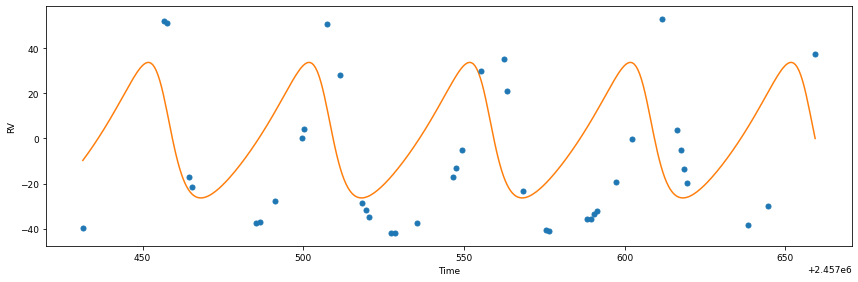

In [11]:
plt.figure()
plot_results(like)

In order to fit the data, we will perform a maximum a posteriori optimization, thus maximise the posterior function using bayesian statistics. That means that the posterior that we construct is

$$ p(\theta) =\textrm{ln}L(\theta \vert \textrm{D}) + \sum_k \textrm{ln P}_k(\theta)$$

where P$_k(\theta)$ are the priors defined by the user. We can construct the posterior and apply constrains as

In [12]:
post = radvel.posterior.Posterior(like)
post.priors += [radvel.prior.EccentricityPrior( 1 )]
post.priors += [radvel.prior.Gaussian( 'jit', np.log(1), np.log(0.1))] # Centred on np.log(1) with sigma np.log(0.1)


For the optimization itself we will use the optimization method from scipy!

parameter                     value      vary
per1                        51.4424       True
tp1                     2.45694e+06       True
e1                         0.426201       True
w1                          19.2294       True
k1                          47.4896       True
gamma                             0      False
dvdt                   -5.49303e-06       True
curv                              0       True
jit                    -0.000241798       True

Priors
------
e1 constrained to be < 0.99
Gaussian prior on jit, mu=0.0, sigma=-2.3025850929940455



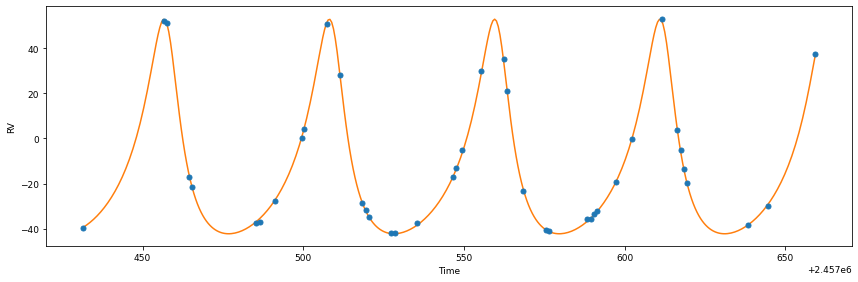

In [13]:
from scipy import optimize
res  = optimize.minimize(
    post.neglogprob_array,     # objective function is negative log likelihood
    post.get_vary_params(),    # initial variable parameters
    method='Powell',           
    )

plot_results(like)             # plot best fit model
print(post)

Finally, we can obtain refine our results and find the errors using the Markov Chain Monte Carlo (MCMC, https://en.wikipedia.org/wiki/Markov_chain_Monte_Carlo) method to explore the posterior probability surface and estimate the parameters uncertainties

In [14]:
df = radvel.mcmc(post,nwalkers=20,nrun=1000,savename='rawchains.h5') 
# 10000 will be necessary for proper convergence

160000/160000 (100.0%) steps complete; Running 10908.75 steps/s; Mean acceptance rate = 4.4%; Min Auto Factor =  15; Max Auto Relative-Change = 0.0694; Min Tz = 119.9; Max G-R = 1.370

MCMC: WARNING: chains did not pass convergence tests. They are likely not well-mixed.


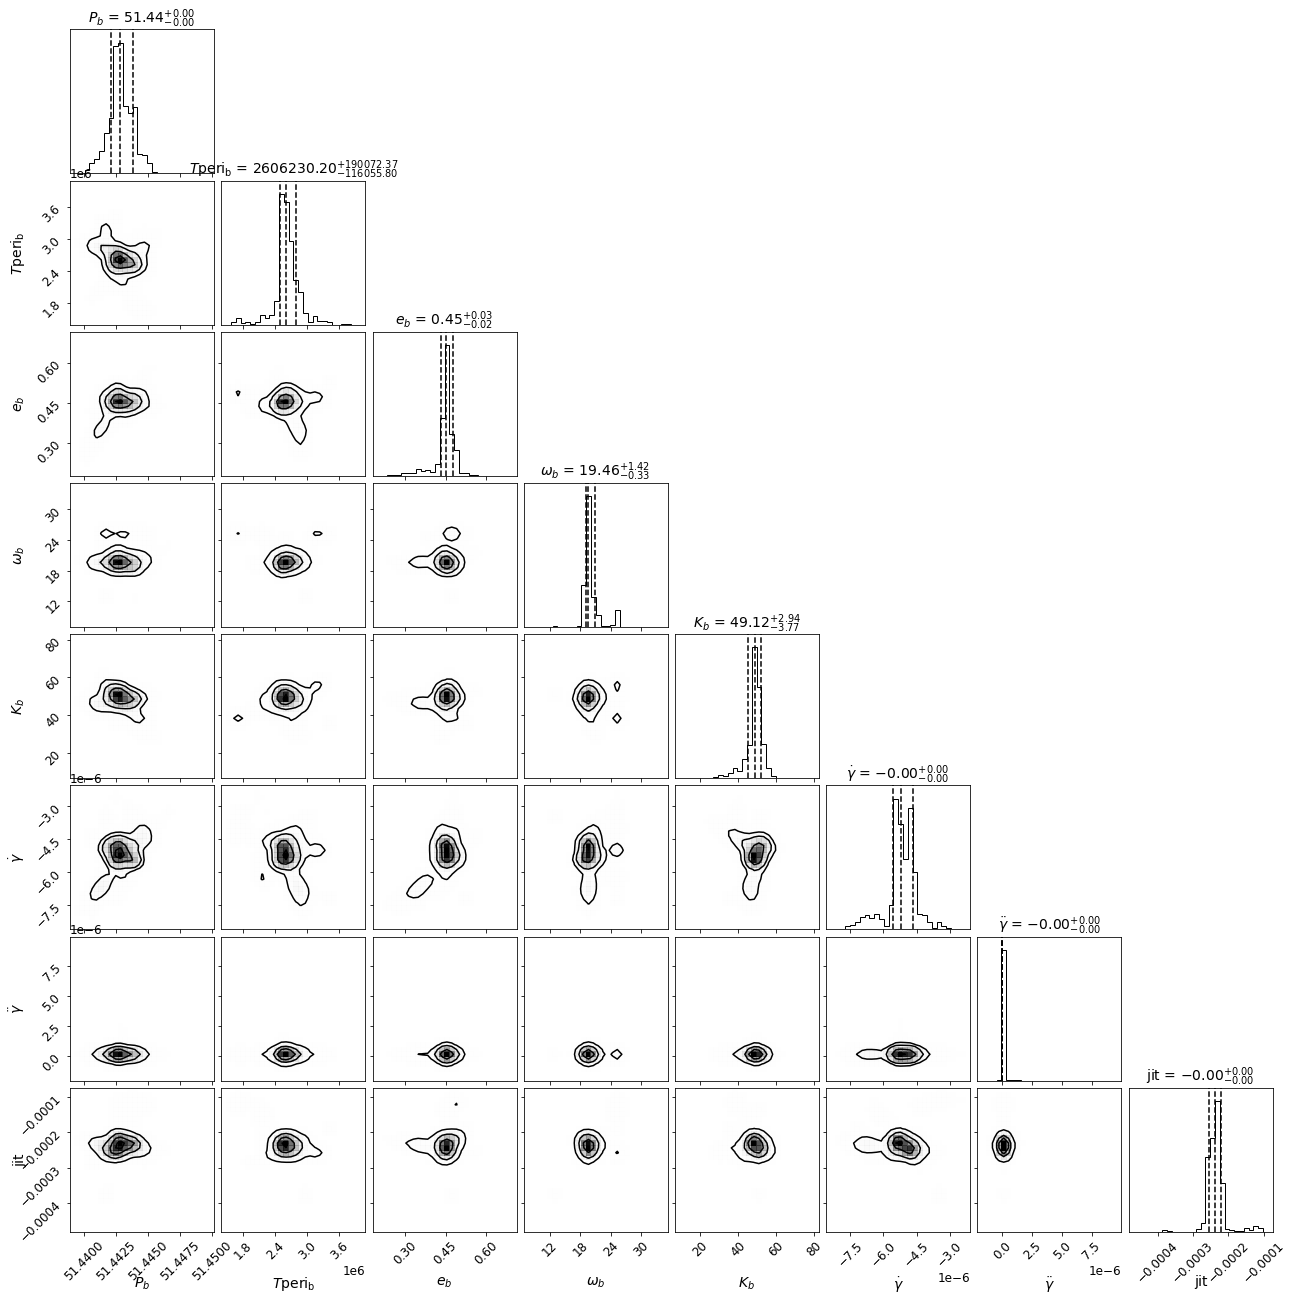

In [15]:
from radvel.plot import mcmc_plots
Corner = mcmc_plots.CornerPlot(post, df)
Corner.plot()

### Exercise:

Obtain the mass function for the binary $\phi$ Draconis and plot the phase folded model of its radial velocity.